# Bonus - Visualization
Visualization of PM2.5 and PM10 measurement, actual and prediction, year 2021

The optimized model and inputs refered to Pollution ANN model file.

In [54]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
data = pd.read_csv('bangkok-air-quality.csv')
df = pd.DataFrame(data)
df = df[['date',' pm25',' pm10']]

In [7]:
for x in df.index:
    if df.loc[x, " pm25"] == " ":
        df.drop(x, inplace = True)
for x in df.index:
    if df.loc[x, " pm10"] == " ":
        df.drop(x, inplace = True)
for x in df.index:        
    YMD = df.loc[x, "date"].split("/")  # use only data since 2017 - 2021
    if int(YMD[0]) < 2017 or int(YMD[0]) > 2021: 
        df.drop(x, inplace = True)
        
        
df[' pm25'] = df[' pm25'].astype(int)
df[' pm10'] = df[' pm10'].astype(int)

In [8]:
def ToWeekday(date):
    YMD = date.split("/")
    Dayinweek = datetime.datetime(int(YMD[0]), int(YMD[1]), int(YMD[2])).weekday()
    return Dayinweek

def ToWeeknum(date):
    YMD = date.split("/")
    Weeknum = datetime.date(int(YMD[0]), int(YMD[1]), int(YMD[2])).isocalendar().week
    return Weeknum

In [9]:
df['weekday'] = df.apply(lambda row: ToWeekday(row.date), axis = 1)
df['weeknum'] = df.apply(lambda row: ToWeeknum(row.date), axis = 1)
df

,date,pm25,pm10,weekday,weeknum
33,2021/10/1,58,24,4,39
34,2021/10/2,57,36,5,39
35,2021/10/3,72,33,6,39
36,2021/10/4,73,43,0,40
37,2021/10/5,83,26,1,40
...,...,...,...,...,...
1847,2017/3/27,91,43,0,13
1848,2017/3/28,106,40,1,13
1849,2017/3/29,100,37,2,13
1850,2017/3/30,88,19,3,13


In [10]:
X = df.iloc[:, 3:5]
Y = df.iloc[:, 1:3]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,random_state = 3)
mlp_rg = MLPRegressor(max_iter=2200)
mlp_rg.fit(Xtrain, Ytrain)

MLPRegressor(max_iter=2200)

In [14]:
Ypred = mlp_rg.predict(Xtest)

print('Test R^2 Score : %.3f'%mlp_rg.score(Xtest, Ytest)) ## Score method also evaluates accuracy for classification models.
print('Training R^2 Score : %.3f'%mlp_rg.score(Xtrain, Ytrain))

Test R^2 Score : 0.529
Training R^2 Score : 0.498


**Next, let the model predict data having weekday and weeknum as inputs. Then, we will combine the dataset of predicted and actual pollution**

In [43]:
prediction = pd.DataFrame(mlp_rg.predict(X), columns=['predicted_pm25', 'predictedpm10'])
prediction

,predicted_pm25,predictedpm10
0,75.269728,35.920224
1,73.310239,34.729712
2,71.350750,33.539200
3,78.257838,38.113749
4,78.767774,38.242119
...,...,...
1807,89.875283,42.352090
1808,88.226425,41.478266
1809,85.703315,40.071971
1810,84.145466,39.234188


In [44]:
prediction = pd.concat([df.reset_index(drop=True),prediction.reset_index(drop=True)], axis=1)
prediction

,date,pm25,pm10,weekday,weeknum,predicted_pm25,predictedpm10
0,2021/10/1,58,24,4,39,75.269728,35.920224
1,2021/10/2,57,36,5,39,73.310239,34.729712
2,2021/10/3,72,33,6,39,71.350750,33.539200
3,2021/10/4,73,43,0,40,78.257838,38.113749
4,2021/10/5,83,26,1,40,78.767774,38.242119
...,...,...,...,...,...,...,...
1807,2017/3/27,91,43,0,13,89.875283,42.352090
1808,2017/3/28,106,40,1,13,88.226425,41.478266
1809,2017/3/29,100,37,2,13,85.703315,40.071971
1810,2017/3/30,88,19,3,13,84.145466,39.234188


In [58]:
def ToDateformat(date):
    YMD = date.split("/")
    return datetime(int(YMD[0]), int(YMD[1]), int(YMD[2]))

In [59]:
prediction['dateformat'] = prediction.apply(lambda row: ToDateformat(row.date), axis = 1)
prediction

,date,pm25,pm10,weekday,weeknum,predicted_pm25,predictedpm10,dateformat
0,2021/10/1,58,24,4,39,75.269728,35.920224,2021-10-01
1,2021/10/2,57,36,5,39,73.310239,34.729712,2021-10-02
2,2021/10/3,72,33,6,39,71.350750,33.539200,2021-10-03
3,2021/10/4,73,43,0,40,78.257838,38.113749,2021-10-04
4,2021/10/5,83,26,1,40,78.767774,38.242119,2021-10-05
...,...,...,...,...,...,...,...,...
1807,2017/3/27,91,43,0,13,89.875283,42.352090,2017-03-27
1808,2017/3/28,106,40,1,13,88.226425,41.478266,2017-03-28
1809,2017/3/29,100,37,2,13,85.703315,40.071971,2017-03-29
1810,2017/3/30,88,19,3,13,84.145466,39.234188,2017-03-30


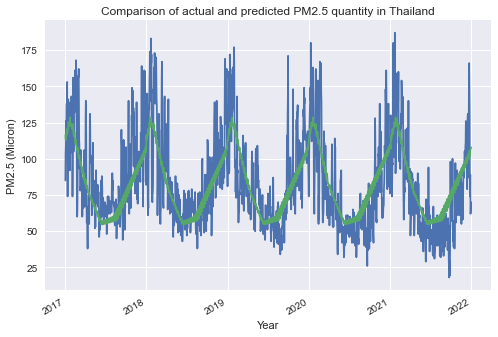

In [80]:
plt.style.use('seaborn')

prediction.sort_values('dateformat', inplace=True)
plt.plot(prediction['dateformat'], prediction[' pm25'], linestyle='solid')
plt.plot(prediction['dateformat'], prediction['predicted_pm25'], linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('Comparison of actual and predicted PM2.5 quantity in Thailand')
plt.xlabel('Year')
plt.ylabel('PM2.5 (Micron)')

plt.show()

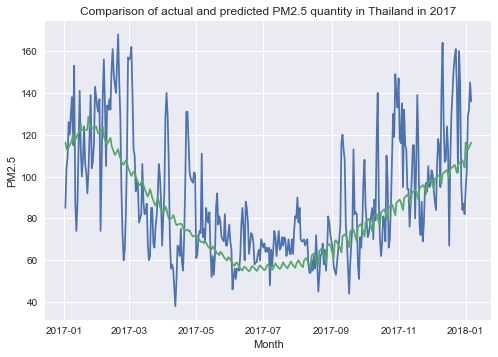

In [81]:
plt.style.use('seaborn')

prediction.sort_values('dateformat', inplace=True)
plt.plot(prediction['dateformat'].iloc[0:365], prediction[' pm25'].iloc[0:365], linestyle='solid')
plt.plot(prediction['dateformat'].iloc[0:365], prediction['predicted_pm25'].iloc[0:365], linestyle='solid')

plt.title('Comparison of actual and predicted PM2.5 quantity in Thailand in 2017')
plt.xlabel('Month')
plt.ylabel('PM2.5')

plt.show()

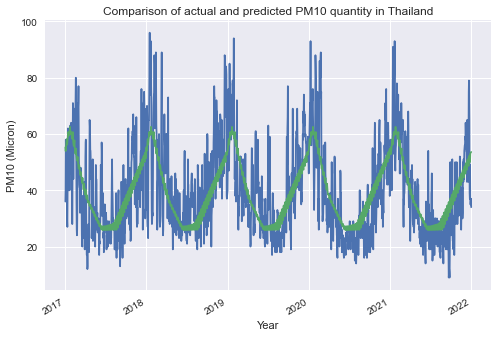

In [83]:
plt.style.use('seaborn')

prediction.sort_values('dateformat', inplace=True)
plt.plot(prediction['dateformat'], prediction[' pm10'], linestyle='solid')
plt.plot(prediction['dateformat'], prediction['predictedpm10'], linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('Comparison of actual and predicted PM10 quantity in Thailand')
plt.xlabel('Year')
plt.ylabel('PM10 (Micron)')

plt.show()

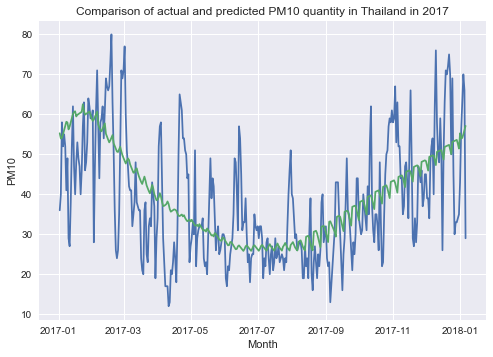

In [84]:
plt.style.use('seaborn')

prediction.sort_values('dateformat', inplace=True)
plt.plot(prediction['dateformat'].iloc[0:365], prediction[' pm10'].iloc[0:365], linestyle='solid')
plt.plot(prediction['dateformat'].iloc[0:365], prediction['predictedpm10'].iloc[0:365], linestyle='solid')

plt.title('Comparison of actual and predicted PM10 quantity in Thailand in 2017')
plt.xlabel('Month')
plt.ylabel('PM10')

plt.show()

## Conclusion
- PM2.5 and PM10 trends went the same way
- They have seasonal trend yearly with high fluctuation
- The model tries to be not too fluctuated